# Decision tree

Stop splitting rules:

    - 100% of one class in node
    - exceeding max depth
    - improvements in purity below treshold
    - number of examples below treshold

***

## Splitting rules

### Entropy

Measure of impurity of the node. Takes values between 0 and 1 (the smaller the better).

$$ E = - \sum_{i=1}^{m} p_i*log_2(p_i) = -p_1*log_2(p_1)-(1-p_1)*log_2(1-p_1) $$

pi - probability of selecting class i in the node

Text(0.5, 1.0, 'Entropy')

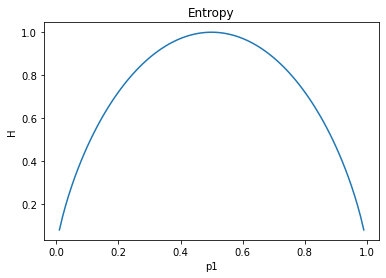

In [13]:
import matplotlib.pyplot as plt
import numpy as np
x=np.linspace(0.01,0.99,100)
plt.plot(x,-x*np.log2(x)-(1-x)*np.log2(1-x))
plt.xlabel('p1')
plt.ylabel('H')
plt.title('Entropy')

### Gini

Another cryterium for measuring purity of node. Takes values between 0 and 0.5 (the smaller the better).

$$ Gini = 1 - \sum_{i=1}^{m} p_i^{2} = 1-p_1^{2}-(1-p_1)^{2} $$

***

### Information gain

Used to choose the feature to split the data in node. `The higher the better`.

$$ Information Gain = H(p_1)^{root} - (w^{left}*H(p_1)^{left}+w^{right}*H(p_1)^{right}) $$

w stands for wighted average

***

## One-hot encoding

Instead on `one feature taking n values`, create `n features taking 0 or 1 values` (whwther the feature is present for the record)

With this setup we can still use the splitting cryterions like `Gini` or `Entropy`

## Continuous features

For continous values choose a `threshold` that can split the data best (has the best `information gain`).

***

# Regression tree

Tree will group the observations and return `average value` of the `continuous feture` in the `group`.

Splits will be made by reducing the `variance` of the continuous feature in groups.

Information Gain will use `variance instead of entropy` and show largest variance reduction.

$$ Information Gain = Variance^{root} - (w^{left}*Variance^{left}+w^{right}*Variance^{right}) $$

w stands for wighted average

***

In [17]:
import numpy as np

In [40]:
x=np.array([[1,1,1],[0,0,1],[0,1,0],[1,0,1],[1,1,1],[1,1,0],[0,0,0],[1,1,0],[0,1,0],[0,1,0]])
y=np.array([1,1,0,0,1,1,0,1,0,0])

In [41]:
def entropy(p):
    if p==0 or p==1:
        return 0
    else:
        return -p*np.log2(p)-(1-p)*np.log2(1-p)
print(entropy(0.5))

1.0


In [42]:
def split_incides(X,index_feature):
    left_incides=[]
    right_incides=[]
    for i,x in enumerate(X):
        if x[index_feature]==1:
            left_incides.append(i)
        else:
            right_incides.append(i)
    return left_incides, right_incides

In [51]:
def weighted_entropy(X,Y,left_incides,right_incides):
    w_left=len(left_incides)/len(X)
    w_right=len(right_incides)/len(X)
    p_left=sum(Y[left_incides])/len(left_incides)
    p_right=sum(Y[right_incides])/len(right_incides)
    
    weighted_entropy=w_left*entropy(p_left)+w_right*entropy(p_right)
    return weighted_entropy

In [54]:
left_incides,right_incides=split_incides(x,0)
weighted_entropy(x,y,left_incides,right_incides)

0.7219280948873623

In [55]:
def information_gain(X,Y,left_incides,right_incides):
    p_node=sum(Y)/len(Y)
    h_node=entropy(p_node)
    w_entropy=weighted_entropy(X,Y,left_incides,right_incides)
    return h_node-w_entropy

In [57]:
information_gain(x,y,left_incides,right_incides)

0.2780719051126377

In [59]:
for i, feature in enumerate(['ear','face','hair']):
    left_incides,right_incides=split_incides(x,i)
    i_gain=information_gain(x,y,left_incides,right_incides)
    print(f'feature: {feature}, informatio gain: {i_gain:.3f}')

feature: ear, informatio gain: 0.278
feature: face, informatio gain: 0.035
feature: hair, informatio gain: 0.125


***

# Tree ensembles

`single tree` can be very sensitive to chenges in the data

`tree ensemble` - a collection of different trees (trees vote on the final prediciton)

### sampling with replacement

sampling on the same dataset without changing it (so each time each item has the same chance to be chosen)

for each tree we create a subset with the same size (training set) based on the original one (but diffenrent as we randomly choose the items with replacement (each can be chosen more then once))

## Random forest

`random forest` si one of tree ensembles options

at each node a `feature` to split is `randomly chosen` from a `subset of features`

random `subset of features` and random `subset of training examples`

`n_estimators` - number of trees

## XGBoost

similar to random forest but while creating next datasets for new trees we `promote the presence of obserwations that were misclassified`

the changes are being made to te `original dataset`

`XGBRegressor` - for regression 

`learning_rate` - size of the step on Gradient Descent method that XGBoost uses to minimize error on each train step

`early_stoping_rounds` - stops the training if evaluation metric is no longer improving on the validation set (by default set to 10)

`eval_set = [(x_train_eval,y_train_eval)]` - set to evaluate results for early stoping

 - model keeps track of the round with best performance (lowest eval metric) 
 - each successive round's eval is compared to the best metric. if the model goes 10 rounds where none has better metric then hte modek stops training
 - the model is returned at its last state when training is terminated, not during the best round. If best performance was at round 15 then the model will be returned after round 25.

***

## Practice

In [26]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

#### data

In [4]:
df=pd.read_csv('data/heart.csv')

In [5]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,60,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,35,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,55,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,56,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
cat_variables=['sex','cp','restecg','exng','slp']

In [7]:
df=pd.get_dummies(data=df,prefix=cat_variables,columns=cat_variables)

In [8]:
df.head()

,age,trtbps,chol,fbs,thalachh,oldpeak,caa,thall,output,sex_0,...,cp_2,cp_3,restecg_0,restecg_1,restecg_2,exng_0,exng_1,slp_0,slp_1,slp_2
0,60,145,233,1,150,2.3,0,1,1,0,...,0,1,1,0,0,1,0,1,0,0
1,35,130,250,0,187,3.5,0,2,1,0,...,1,0,0,1,0,1,0,1,0,0
2,41,130,204,0,172,1.4,0,2,1,1,...,0,0,1,0,0,1,0,0,0,1
3,55,120,236,0,178,0.8,0,2,1,0,...,0,0,0,1,0,1,0,0,0,1
4,56,120,354,0,163,0.6,0,2,1,1,...,0,0,0,1,0,0,1,0,0,1


In [9]:
features=df.columns
features=features.drop('output')

In [10]:
x_train,x_val,y_train,y_val=train_test_split(df[features],df['output'],train_size=0.8,random_state=55)
print(f'x_train: {len(x_train)}')
print(f'x_val: {len(x_val)}')
print(f'proportion: {sum(y_train)/len(y_train):.3f}')

x_train: 231
x_val: 58
proportion: 0.593


In [12]:
RANDOM_STATE=55

#### decision tree

In [53]:
min_samples_split=[2,10,30,50,80,100,150,190,200]
max_depth=[1,2,4,16,32,64]

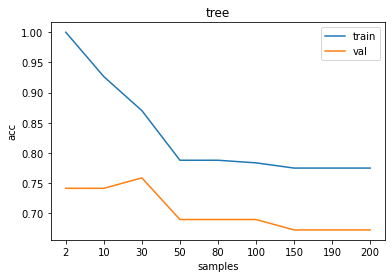

In [54]:
acc_train_list=[]
acc_val_list=[]
for samples in min_samples_split:
    model=DecisionTreeClassifier(min_samples_split=samples,random_state=RANDOM_STATE).fit(x_train,y_train)
    predictions_train=model.predict(x_train)
    predictions_val=model.predict(x_val)
    acc_train=accuracy_score(predictions_train,y_train)
    acc_val=accuracy_score(predictions_val,y_val)
    acc_train_list.append(acc_train)
    acc_val_list.append(acc_val)

plt.title('tree')
plt.xlabel('samples')
plt.ylabel('acc')
plt.xticks(ticks=range(len(min_samples_split)),labels=min_samples_split)
plt.plot(acc_train_list,label='train')
plt.plot(acc_val_list,label='val')
plt.legend()

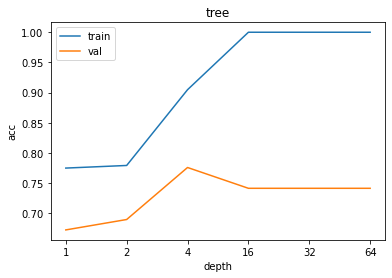

In [55]:
acc_train_list=[]
acc_val_list=[]
for depth in max_depth:
    model=DecisionTreeClassifier(max_depth=depth,random_state=RANDOM_STATE).fit(x_train,y_train)
    predictions_train=model.predict(x_train)
    predictions_val=model.predict(x_val)
    acc_train=accuracy_score(predictions_train,y_train)
    acc_val=accuracy_score(predictions_val,y_val)
    acc_train_list.append(acc_train)
    acc_val_list.append(acc_val)

plt.title('tree')
plt.xlabel('depth')
plt.ylabel('acc')
plt.xticks(ticks=range(len(max_depth)),labels=max_depth)
plt.plot(acc_train_list,label='train')
plt.plot(acc_val_list,label='val')
plt.legend()

best performance for `max_depth=4`, `min_samples=30`

In [56]:
decision_tree=DecisionTreeClassifier(min_samples_split=30,max_depth=4,random_state=RANDOM_STATE).fit(x_train,y_train)

In [60]:
print(f'accuracy_train: {accuracy_score(decision_tree.predict(x_train),y_train):.3f}')
print(f'accuracy_val: {accuracy_score(decision_tree.predict(x_val),y_val):.3f}')

accuracy_train: 0.870
accuracy_val: 0.759


#### random forest

In [1]:
min_samples_split=[2,10,30,50,80,100,150,190,200]
max_depth=[1,2,4,16,32,64]
n_estimators=[10,50,100,200]

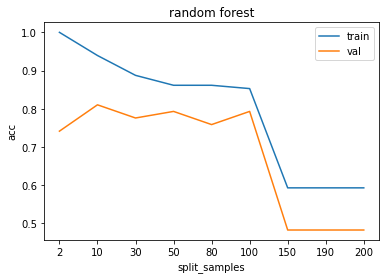

In [15]:
acc_train_list=[]
acc_val_list=[]
for samples in min_samples_split:
    model=RandomForestClassifier(min_samples_split=samples,random_state=RANDOM_STATE)
    model.fit(x_train,y_train)
    predictions_train=model.predict(x_train)
    predictions_val=model.predict(x_val)
    acc_train=accuracy_score(predictions_train,y_train)
    acc_val=accuracy_score(predictions_val,y_val)
    acc_train_list.append(acc_train)
    acc_val_list.append(acc_val)

plt.title('random forest')
plt.xlabel('split_samples')
plt.ylabel('acc')
plt.xticks(ticks=range(len(min_samples_split)),labels=min_samples_split)
plt.plot(acc_train_list,label='train')
plt.plot(acc_val_list,label='val')
plt.legend()

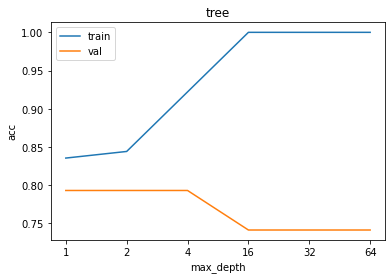

In [16]:
acc_train_list=[]
acc_val_list=[]
for depth in max_depth:
    model=RandomForestClassifier(max_depth=depth,random_state=RANDOM_STATE)
    model.fit(x_train,y_train)
    predictions_train=model.predict(x_train)
    predictions_val=model.predict(x_val)
    acc_train=accuracy_score(predictions_train,y_train)
    acc_val=accuracy_score(predictions_val,y_val)
    acc_train_list.append(acc_train)
    acc_val_list.append(acc_val)

plt.title('tree')
plt.xlabel('max_depth')
plt.ylabel('acc')
plt.xticks(ticks=range(len(max_depth)),labels=max_depth)
plt.plot(acc_train_list,label='train')
plt.plot(acc_val_list,label='val')
plt.legend()

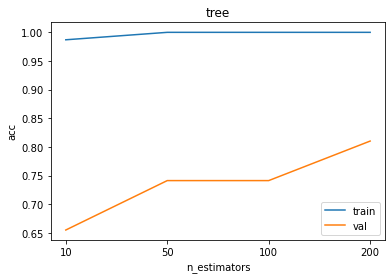

In [18]:
acc_train_list=[]
acc_val_list=[]
for estimators in n_estimators:
    model=RandomForestClassifier(n_estimators=estimators,random_state=RANDOM_STATE)
    model.fit(x_train,y_train)
    predictions_train=model.predict(x_train)
    predictions_val=model.predict(x_val)
    acc_train=accuracy_score(predictions_train,y_train)
    acc_val=accuracy_score(predictions_val,y_val)
    acc_train_list.append(acc_train)
    acc_val_list.append(acc_val)

plt.title('tree')
plt.xlabel('n_estimators')
plt.ylabel('acc')
plt.xticks(ticks=range(len(n_estimators)),labels=n_estimators)
plt.plot(acc_train_list,label='train')
plt.plot(acc_val_list,label='val')
plt.legend()

In [20]:
random_forest=RandomForestClassifier(n_estimators=100,min_samples_split=100,max_depth=4,random_state=RANDOM_STATE).fit(x_train,y_train)

In [21]:
print(f'accuracy_train: {accuracy_score(random_forest.predict(x_train),y_train):.3f}')
print(f'accuracy_val: {accuracy_score(random_forest.predict(x_val),y_val):.3f}')

accuracy_train: 0.853
accuracy_val: 0.793


#### XGBoost

In [23]:
n=int(len(x_train)*0.8)

In [24]:
x_train_fit,x_train_eval,y_train_fit,y_train_eval=x_train[:n],x_train[n:],y_train[:n],y_train[n:]

In [27]:
xgb_model=XGBClassifier(n_estimators=500,learning_rate=0.1,verbosity=1,random_state=RANDOM_STATE)
xgb_model.fit(x_train_fit,y_train_fit,eval_set=[(x_train_eval,y_train_eval)],early_stopping_rounds=10)

[0]	validation_0-logloss:0.64745
[1]	validation_0-logloss:0.60842
[2]	validation_0-logloss:0.57797
[3]	validation_0-logloss:0.54790
[4]	validation_0-logloss:0.52447
[5]	validation_0-logloss:0.50281
[6]	validation_0-logloss:0.48661
[7]	validation_0-logloss:0.46833
[8]	validation_0-logloss:0.44534
[9]	validation_0-logloss:0.43353
[10]	validation_0-logloss:0.42793
[11]	validation_0-logloss:0.41467
[12]	validation_0-logloss:0.40486
[13]	validation_0-logloss:0.39269
[14]	validation_0-logloss:0.38651
[15]	validation_0-logloss:0.38628
[16]	validation_0-logloss:0.37788
[17]	validation_0-logloss:0.36861
[18]	validation_0-logloss:0.36602
[19]	validation_0-logloss:0.35803
[20]	validation_0-logloss:0.34988
[21]	validation_0-logloss:0.34303
[22]	validation_0-logloss:0.34732
[23]	validation_0-logloss:0.34176
[24]	validation_0-logloss:0.33936
[25]	validation_0-logloss:0.33904
[26]	validation_0-logloss:0.34036
[27]	validation_0-logloss:0.33799
[28]	validation_0-logloss:0.33819
[29]	validation_0-loglos

C:\Users\pk764\miniconda3\envs\data\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[60]	validation_0-logloss:0.33584
[61]	validation_0-logloss:0.33139
[62]	validation_0-logloss:0.33214


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=55, ...)

In [28]:
xgb_model.best_iteration

52

In [29]:
print(f'accuracy_train: {accuracy_score(xgb_model.predict(x_train),y_train):.3f}')
print(f'accuracy_val: {accuracy_score(xgb_model.predict(x_val),y_val):.3f}')

accuracy_train: 0.970
accuracy_val: 0.759


***

### practice lab

In [30]:
def entropy(y):
    """
    calculates entropy for given list
    
    Parameters:
    -----------
    y: ndarray
        array indicating whether each example at node is 1 or 0
    
    Returns:
    --------
    entropy: float
        entropy at the node
    """
    entropy=0
    if len(y)>0:
        p=sum(y)/len(y)
        if p==0 or p==1:
            return entropy
        else:
            entropy=-p*np.log2(p)-(1-p)*np.log2(1-p)
    return entropy

In [39]:
def split_indices(X,node_indices,feature):
    """
    Splits the data at the given node into left and right branches
    
    Parameters:
    -----------
    X: ndarray
        data matrix of shape (n_samples,n_features)
    
    node_indices: list
        list containing active indices (samples being consicered at this step)
    
    feature: int
        index of feature to split on
    
    Returns:
    --------
    left_indices: list
        indices with feature value == 1
    
    right_indices: list
        indices with feature value == 0
    
    """
    left_incides=[]
    right_incides=[]
    
    for index,value in enumerate(X[node_indices,feature]):
        if value==1:
            left_incides.append(node_indices[index])
        else:
            right_incides.append(node_indices[index])
            
    return left_incides, right_incides

In [32]:
def information_gain(x,y,node_indices,feature):
    """
    Computes ingormation gain of splitting node on a given feature
    
    Parameters:
    -----------
    x: array
        data with variables 
    y: list
        list containing target variable
    node_indices: list
        list of active indices
    feature: int
        feature to split on
        
    Returns:
    --------
    information_gain: float
        information_gain for the node
    """
    
    left_indices,right_indices=split_indices(x,node_indices,feature)
    
    x_node,y_node = x[node_indices],y[node_indices]
    
    information_gain=0
    
    entropy_node=entropy(y_node)
    entropy_left=entropy(y[left_indices])
    entropy_right=entropy(y[right_indices])
    
    w_left=len(y[left_indices])/len(y_node)
    w_right=len(y[right_indices])/len(y_node)
    
    information_gain=entropy_node-(w_left*entropy_left+w_right*entropy_right)
    
    return information_gain

In [53]:
def get_best_split(x,y,node_indices):
    features=x.shape[1]
    best_feature=-1
    max_ig=0
    for feature in range(features):
        ig=information_gain(x,y,node_indices,feature)
        if ig>max_ig:
            max_ig=ig
            best_feature=feature
    return best_feature

In [68]:
tree=[]

def build_tree_recursive(x,y,node_indices,branch_name,max_depth,current_depth):
    
    if current_depth==max_depth:
        print(f' -{branch_name}: {node_indices}')
        return
    best_feature=get_best_split(x,y,node_indices)
    print(f'Depth: {current_depth}, {branch_name},split on feature: {best_feature}')
    
    left_indices,right_indices=split_indices(x,node_indices,best_feature)
    tree.append((left_indices,right_indices,best_feature))
    
    build_tree_recursive(x,y,left_indices,'left',max_depth,current_depth+1)
    build_tree_recursive(x,y,right_indices,'right',max_depth,current_depth+1)

In [69]:
x_train=np.array([[1,1,1],[0,0,1],[0,1,0],[1,0,1],[1,1,1],[1,1,0],[0,0,0],[1,1,0],[0,1,0],[0,1,0]])
y_train=np.array([1,1,0,0,1,1,0,1,0,0])
root_indices=[0,1,2,3,4,5,6,7,8,9]

In [70]:
build_tree_recursive(x_train,y_train,root_indices,'root',max_depth=2,current_depth=0)

Depth: 0, root,split on feature: 0
Depth: 1, left,split on feature: 1
 -left: [0, 4, 5, 7]
 -right: [3]
Depth: 1, right,split on feature: 2
 -left: [1]
 -right: [2, 6, 8, 9]
